# **Tugas 1 Machine Learning - Data Preparation**
# Kelompok 7
## Anggota:
*   Nazwa Salsabila (2208107010010)
*   Rizky Yusmansyah (2208107010024)
*   Della Rahmatika (2208107010041)
*   Zuwi Pertiwi (2208107010061)
*   Berliani Utami (2208107010082)

## **Deskripsi Dataset:**
Dataset yang dipilih yaitu dataset Air Quality and Pollution Assessment mencakup faktor lingkungan dan demografi yang memengaruhi tingkat polusi udara. Dataset ini berisi informasi tentang kualitas udara di berbagai wilayah dengan total 5000 sampel yang terdiri dari 9 fitur (suhu, kelembaban, konsentrasi PM2.5, PM10, NO2, SO2, CO, jarak ke kawasan industri, dan kepadatan penduduk). Target variabel dari dataset ini adalah kualitas udara, meliputi baik, sedang, buruk, dan berbahaya.
Link dataset: https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment/data





# **Data Loading**
Untuk membantu dalam memahami data, ada beberapa library yang digunakan pada tahapan awal eksplorasi data

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

Memuat atau mengimpor dataset yang digunakan ke dalam lingkungan pemrograman melalui URL dataset yang sudah di upload ke repository GitHub

In [125]:
# URL dataset
url = "https://raw.githubusercontent.com/rizkyyus/Kelompok_7_Tugas01_Data_Preparation/refs/heads/main/updated_pollution_dataset.csv"

# Membaca dataset langsung dari URL
df = pd.read_csv(url)

# Data Understanding
Melakukan pemahaman awal pada dataset dengan menampilkan statistik dasar dataset serta menampilkan visualisasinya

**Memahami Struktur Dataset**

In [126]:
# Menampilkan data 5 baris pertama
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [127]:
# Menampilkan jumlah baris dan kolom
df.shape

(5000, 10)

In [128]:
# Menampilkan informasi tentang kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [129]:
# Statistik deskriptif
print(df.describe(include="all"))

        Temperature     Humidity        PM2.5         PM10          NO2  \
count   5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      30.029020    70.056120    20.142140    30.218360    26.412100   
std        6.720661    15.863577    24.554546    27.349199     8.895356   
min       13.400000    36.000000     0.000000    -0.200000     7.400000   
25%       25.100000    58.300000     4.600000    12.300000    20.100000   
50%       29.000000    69.800000    12.000000    21.700000    25.300000   
75%       34.000000    80.300000    26.100000    38.100000    31.900000   
max       58.600000   128.100000   295.000000   315.800000    64.900000   

                SO2           CO  Proximity_to_Industrial_Areas  \
count   5000.000000  5000.000000

In [130]:
# Mengecek missing values
print(df.isnull().sum())

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


In [131]:
# Menentukan batas outlier hanya untuk kolom numerik
numerical_columns = df.select_dtypes(include=['number'])

Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menampilkan jumlah outlier di setiap fitur numerik
outliers = ((numerical_columns < lower_bound) | (numerical_columns > upper_bound)).sum()
print("Jumlah outlier pada setiap fitur numerik:")
print(outliers)

Jumlah outlier pada setiap fitur numerik:
Temperature                       72
Humidity                          19
PM2.5                            352
PM10                             324
NO2                               73
SO2                              124
CO                                45
Proximity_to_Industrial_Areas     16
Population_Density                 7
dtype: int64


In [132]:
# Mengecek jumlah duplikasi
print(df.duplicated().sum())

0


**Menampilkan Visualisasi Dataset**

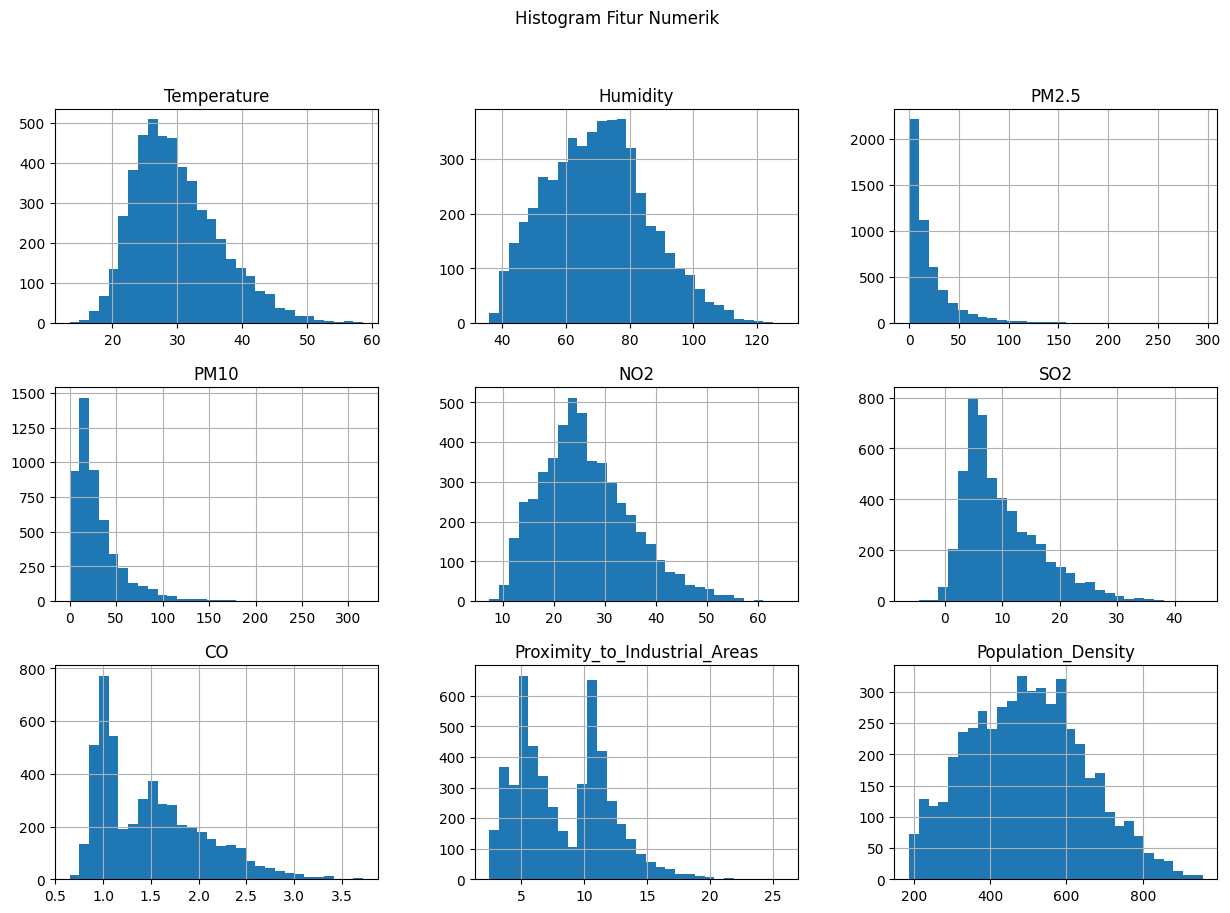

In [133]:
# Histogram untuk fitur numerik
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram Fitur Numerik')
plt.show()

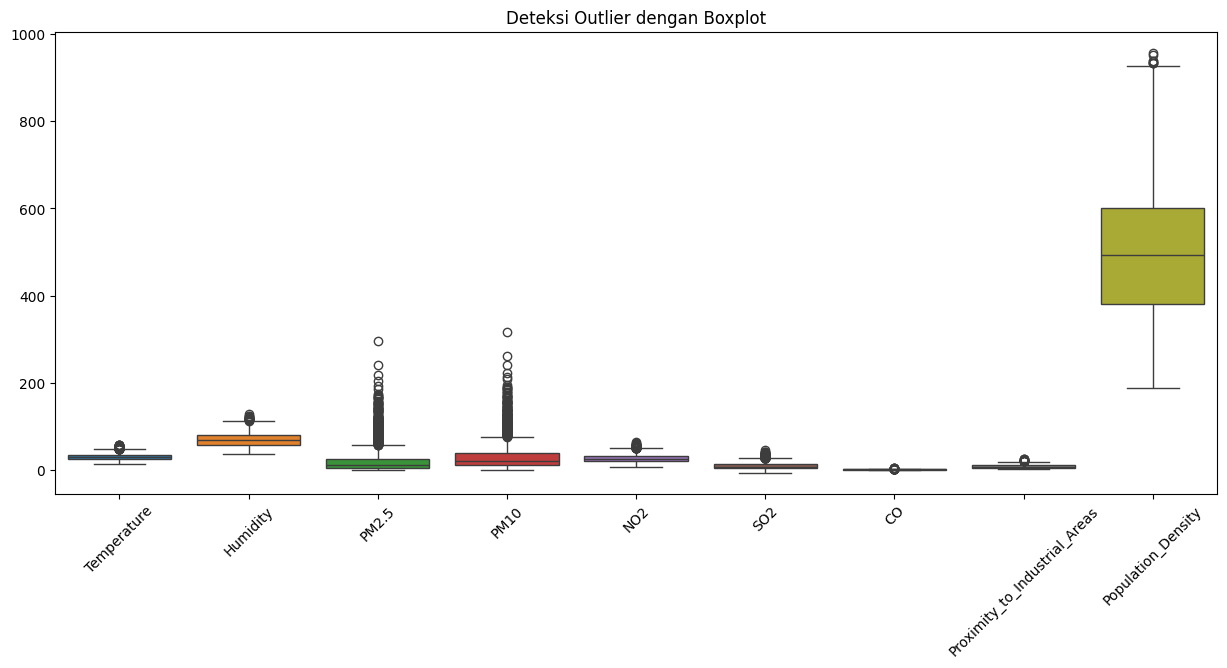

In [134]:
# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(15, 6))
sns.boxplot(data=df.iloc[:, :-1])
plt.xticks(rotation=45)
plt.title("Deteksi Outlier dengan Boxplot")
plt.show()

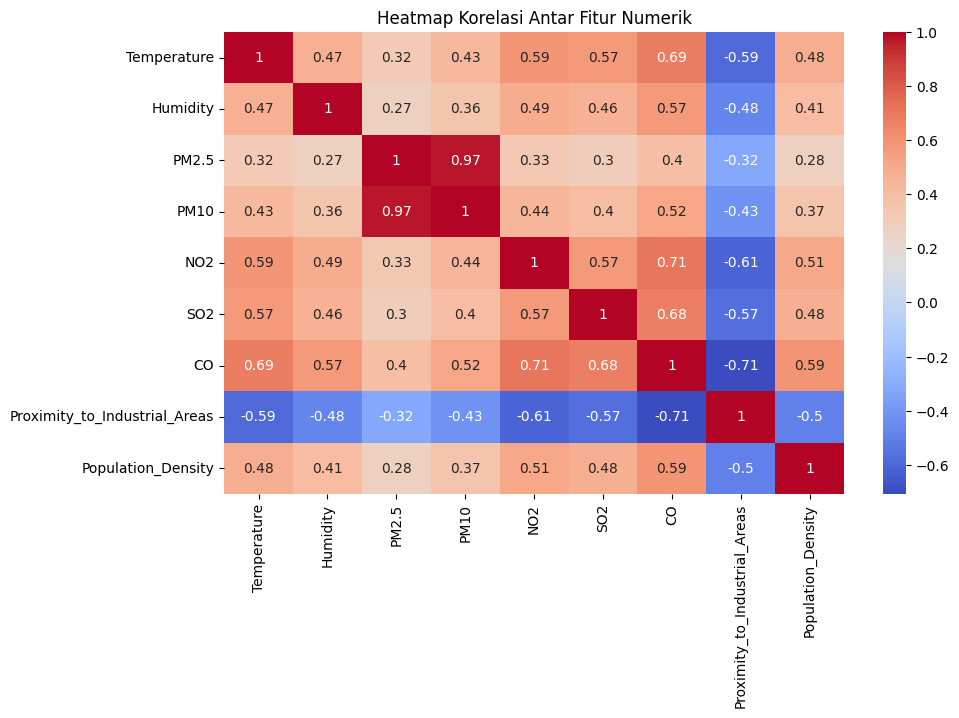

In [135]:
# Memilih hanya kolom numerik untuk korelasi
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

# Data Preparation
Pada tahap ini, hal-hal yang kami lakukan adalah:
1.   Melakukan fitur encoding
2.   Menangani nilai outlier
3.   Menangani nilai negatif
4.   Normalisasi data
5.   Feature selection





## Fitur Encoding
Mengubah variabel Air Quality yang bertipe kategorikal menjadi format numerik:
Kode ini mengubah Good, Moderate, Poor, Hazardous menjadi angka (0, 1, 2, 3).

In [136]:
# Mengonversi kategori Air Quality menjadi angka
encoder = LabelEncoder()
df['Air Quality'] = encoder.fit_transform(df['Air Quality'])
df['Air Quality'].head()

,Air Quality
0,2
1,2
2,2
3,0
4,0


## Menangani Nilai Outlier
Pada data understanding ditemukan beberapa outlier di setiap fitur, sehingga penanganannya dengan capping, mengganti nilai outlier dengan nilai yang di luar batas menjadi batas bawah atau atas.

In [137]:
# Menangani Outlier dengan Capping
for col in df.columns[:-1]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [138]:
# Melihat apakah sudah tidak ada outlier
for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Jumlah outlier pada kolom {col}: {len(outliers)}")

Jumlah outlier pada kolom Temperature: 0
Jumlah outlier pada kolom Humidity: 0
Jumlah outlier pada kolom PM2.5: 0
Jumlah outlier pada kolom PM10: 0
Jumlah outlier pada kolom NO2: 0
Jumlah outlier pada kolom SO2: 0
Jumlah outlier pada kolom CO: 0
Jumlah outlier pada kolom Proximity_to_Industrial_Areas: 0
Jumlah outlier pada kolom Population_Density: 0
Jumlah outlier pada kolom Air Quality: 0


## Menangani Nilai Negatif
Untuk Mencegah error dalam analisis lebih lanjut

In [139]:
# Mengubah nilai negatif menjadi 0
df['PM10'] = df['PM10'].apply(lambda x: max(x, 0))
df['SO2'] = df['SO2'].apply(lambda x: max(x, 0))
df['CO'] = df['CO'].apply(lambda x: max(x, 0))

## Normalisasi Data

Dilakukan untuk scaling fitur agar seimbang, menghindari fitur dengan skala besar mendominasi hasil prediksi

In [140]:
# Pilih kolom polutan yang ingin dinormalisasi
polutan_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Fit dan transform data
df[polutan_cols] = scaler.fit_transform(df[polutan_cols])


## Feature Selection

Mengurangi jumlah fitur agar analisis lebih efisien dan juga menghindari overvitting pada model machine learning

In [141]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(columns=['Air Quality'])  # Semua fitur kecuali label
y = df['Air Quality']  # Label kualitas udara

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)


# Menampilkan Data Setelah Preprocessing

In [142]:
# Menampilkan beberapa baris pertama dari data setelah preprocessing
print(df.head())

# Menyimpan dataset yang sudah diproses
df.to_csv('/content/processed_pollution_dataset.csv', index=False)


   Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0         29.8      59.1  0.089117  0.233073  0.272512  0.345054  0.444906   
1         28.3      75.6  0.039417  0.158854  0.554502  0.363807  0.411642   
2         23.1      74.7  0.457584  0.440104  0.402844  0.472574  0.407484   
3         27.1      39.1  0.104542  0.082031  0.144550  0.198781  0.207900   
4         26.5      70.7  0.118252  0.208333  0.343602  0.210033  0.149688   

   Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                            6.3               319.0            2  
1                            6.0               611.0            2  
2                            5.2               619.0            2  
3                           11.1               551.0            0  
4                           12.7               303.0            0  
